
Problem Statement :- 
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour
(specifically, purchase amount) against various products of different categories. 
They have shared purchase summary of various customers for selected high volume products from 
last month. The data set also contains customer demographics 
(age, gender, marital status, city_type, stay_in_current_city), 
product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against 
various products which will help them to create personalized offer for customers 
against different products.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
black_train = pd.read_csv(r"C:\Users\Sandipsinh\Black_Friday\train.csv")
black_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
black_train.shape

(550068, 12)

In [4]:
black_test = pd.read_csv(r"C:\Users\Sandipsinh\Black_Friday\test.csv")
black_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
# for merging both train and test dataset we can append datasets
black = black_train.append(black_test)
black.head()

C:\Users\Sandipsinh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [6]:
black.shape

(783667, 12)

In [7]:
black.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 62.8+ MB


In [8]:
black.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [9]:
# pd.get_dummies will convert categorical column into numeric one
pd.get_dummies(black['Gender'],drop_first=1)

,M
0,0
1,0
2,0
3,0
4,1
...,...
233594,0
233595,0
233596,0
233597,0


In [10]:
# map function maps or works wrt given condition it is OR method for get_dummies
black['Gender'] = black['Gender'].map({'F':0,'M':1})
black.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [11]:
# Handle categorical feature age
black['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
# pd.get_dummies method not sutable here cause every age category 0-17 has different 1 & 0
# 55 + also diff. 1 & 0 so new 7 columns are formed so this method is not sutable

In [13]:
black['Age'] = black['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

In [14]:
black.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [15]:
black['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
black['City_Category'] = black['City_Category'].map({'A':1, 'B':2, 'C':3})

In [17]:
black.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,1,1,0,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,1,1,0,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,1,1,0,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,7,3,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [18]:
# Missing values
black.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [19]:
black['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
# observation :- This is descrete feature i.e not continues values
# in descrete feature best way to fill missing value is with MODE

In [21]:
black['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [22]:
black['Product_Category_2'].mode()[0]

8.0

In [23]:
black['Product_Category_2'] = black['Product_Category_2'].fillna(black['Product_Category_2'].mode()[0])

In [24]:
black['Product_Category_2'].isnull().sum()

0

In [25]:
# product_category 3 replacing missing values
black['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [26]:
black['Product_Category_3'].mode()[0]

16.0

In [27]:
black['Product_Category_3'] = black['Product_Category_3'].fillna(black['Product_Category_3'].mode()[0])

In [28]:
black['Product_Category_3'].isnull().sum()

0

In [29]:
black.drop('User_ID',axis=1,inplace=True)

In [30]:
black.head(1)

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,1,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2


In [31]:
black.shape

(783667, 11)

In [32]:
black['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [33]:
black['Stay_In_Current_City_Years'] = black['Stay_In_Current_City_Years'].str.replace('+','')

In [34]:
black.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,1,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2
1,1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,1,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2
3,1,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2
4,7,3,1,0,16,8,8.0,16.0,P00285442,7969.0,4


In [35]:
black.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
Age                           783667 non-null int64
City_Category                 783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
dtypes: float64(3), int64(6), object(2)
memory usage: 65.8+ MB


In [36]:
# convert 'Stay_in_current_cities' categorical to numerical
black['Stay_In_Current_City_Years'] = black['Stay_In_Current_City_Years'].astype(int)
black.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
Age                           783667 non-null int64
City_Category                 783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 65.8+ MB


In [37]:
# Visualization

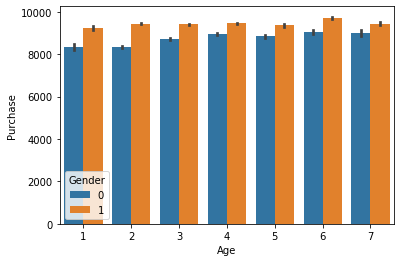

In [38]:
sns.barplot('Age','Purchase',hue='Gender',data=black)

In [39]:
# Observation :- purchasing of male is high than women observed by above graph

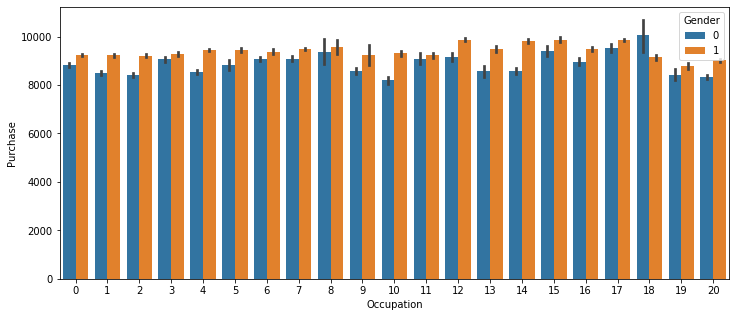

In [42]:
# visualization of purchase with occupation

plt.figure(figsize=(12,5))
sns.barplot('Occupation','Purchase',hue='Gender',data=black)

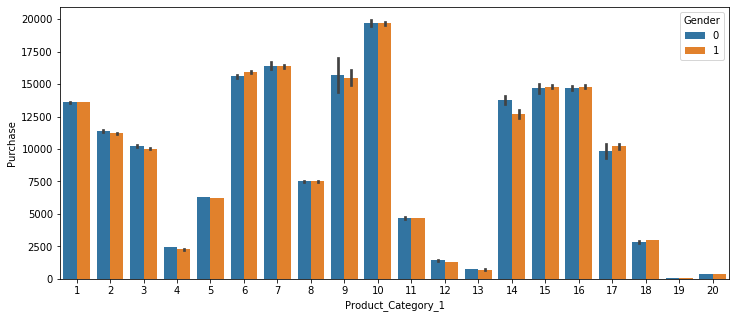

In [43]:
plt.figure(figsize=(12,5))
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=black)

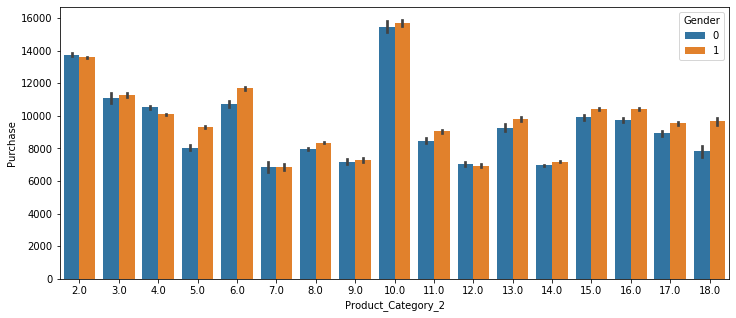

In [44]:
plt.figure(figsize=(12,5))
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=black)

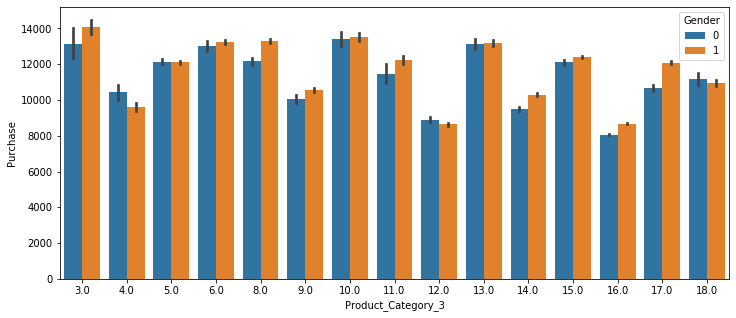

In [45]:
plt.figure(figsize=(12,5))
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=black)

In [46]:
black.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,1,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2
1,1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,1,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2
3,1,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2
4,7,3,1,0,16,8,8.0,16.0,P00285442,7969.0,4


In [69]:
# Feature scaling
black_test=black[black['Purchase'].isnull()]

In [70]:
black_train=black[~black['Purchase'].isnull()]

In [71]:
X = black_train.drop('Purchase',axis=1)
y=  black_train['Purchase']

In [72]:
print(X.shape)
print(y.shape)

(550068, 10)
(550068,)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

C:\Users\Sandipsinh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)